In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

# 作业1：绘制有理Bezier曲线 选取（0,0）（0，1）（1,1），比较其与多项式的仿射变换

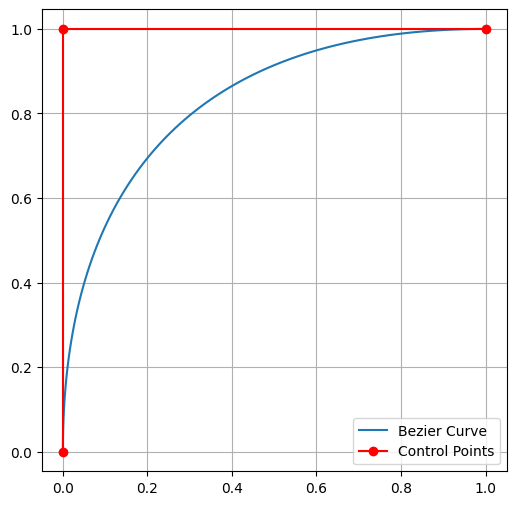

In [2]:
# 定义控制点
points = np.array([[0, 0], [0, 1], [1,1]])

# 计算贝塞尔曲线上的点
def bezier_curve(points, t):
    n = len(points) - 1
    curve_point = np.zeros((2,), dtype=float)
    for i, point in enumerate(points):
        curve_point += comb(n, i) * (t ** i) * ((1 - t) ** (n - i)) * point
    return curve_point

# 计算组合数
def comb(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# 生成t的值
t_values = np.linspace(0, 1, 100)

# 计算曲线上的点
curve_points = np.array([bezier_curve(points, t) for t in t_values])

# 绘制曲线
plt.figure(figsize=(6, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bezier Curve')
plt.plot(points[:, 0], points[:, 1], 'ro-', label='Control Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## 将三个点旋转45度后画曲线 （0，0）， （\sqrt(2)/2, \sqrt(2)/2）（\sqrt(2),0）

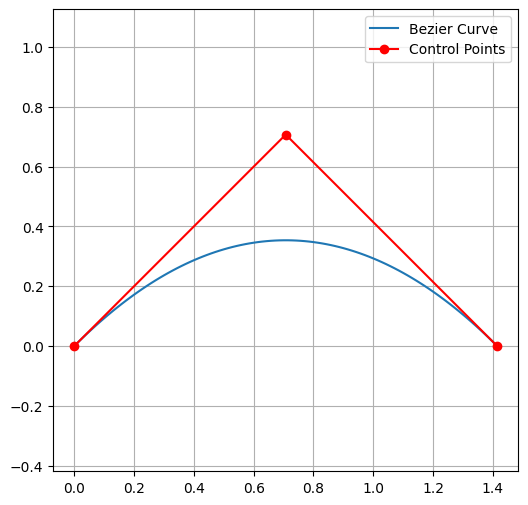

In [3]:
#定义旋转后的点
rotated_points = [np.array((0,0)), np.array((math.sqrt(2)/2, math.sqrt(2)/2)), np.array((math.sqrt(2),0))]

# 计算组合数
def comb(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

# 生成t的值
t_values = np.linspace(0, 1, 100)

# 计算曲线上的点
rotated_curve_points = np.array([bezier_curve(rotated_points, t) for t in t_values])

#绘制曲线
# 绘制曲线
plt.figure(figsize=(6, 6))
plt.plot(rotated_curve_points[:, 0], rotated_curve_points[:, 1], label='Bezier Curve')
plt.plot([p[0] for p in rotated_points], [p[1] for p in rotated_points], 'ro-', label='Control Points')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


## 结论：可以看出Bezier曲线具有仿射不变性

## 过（0,0）（0，1）（2，0）这三个点的二次多项式插值

/var/folders/nv/dz6531zs5j55fkgkqvfp8vp80000gn/T/ipykernel_99831/429522540.py:6: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_data, y_data, 2)


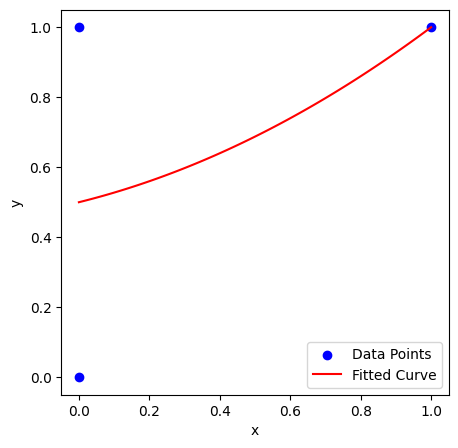

In [4]:
# 假设有一些数据点 x_data 和 y_data
x_data = [0, 0, 1]
y_data = [0, 1, 1]

# 使用numpy的polyfit函数拟合二次多项式
coeffs = np.polyfit(x_data, y_data, 2)
f = np.poly1d(coeffs)

# 生成数据点
t_values = np.linspace(0, 1, 100)
y_t_values = f(t_values)

# 绘制曲线
plt.figure(figsize=(5, 5))
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.plot(t_values, y_t_values, color='red', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 将三个点旋转45

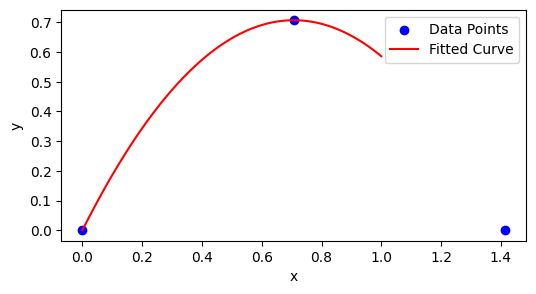

In [9]:
# 更换初始数据点
x_data = [0, math.sqrt(2)/2, math.sqrt(2)]
y_data = [0, math.sqrt(2)/2, 0]

# 使用numpy的polyfit函数拟合二次多项式
coeffs = np.polyfit(x_data, y_data, 2)
f = np.poly1d(coeffs)

# 生成数据点
t_values = np.linspace(0, 1, 100)
y_t_values = f(t_values)

# 绘制曲线
plt.figure(figsize=(6, 3))
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.plot(t_values, y_t_values, color='red', label='Fitted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 结论：曲线的形状会随之发生变化

# 作业2: 绘制生成通过三个控制点 （0，0）（1，0）(1,1) 的有理Bezier曲线，并能控制其形状（抛物线、双曲线、椭圆）

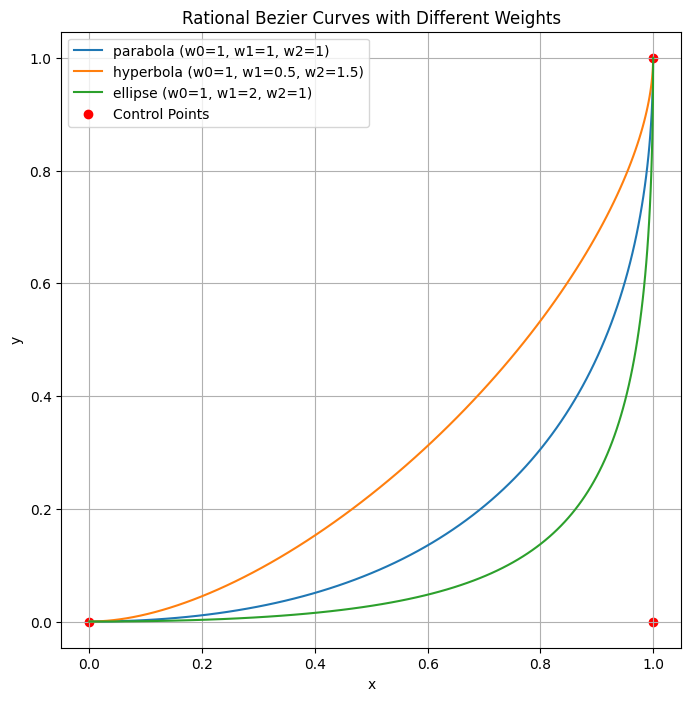

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rational_bezier_curve(P0, P1, P2, w0, w1, w2, num_points=100):
    # 生成t参数
    t_values = np.linspace(0, 1, num_points)

    # Bernstein基函数
    B0 = (1 - t_values) ** 2
    B1 = 2 * t_values * (1 - t_values)
    B2 = t_values ** 2

    # 加权后的控制点
    numerator_x = w0 * P0[0] * B0 + w1 * P1[0] * B1 + w2 * P2[0] * B2
    numerator_y = w0 * P0[1] * B0 + w1 * P1[1] * B1 + w2 * P2[1] * B2

    denominator = w0 * B0 + w1 * B1 + w2 * B2

    # 有理Bezier曲线的点
    curve_x = numerator_x / denominator
    curve_y = numerator_y / denominator

    return curve_x, curve_y

# 控制点
P0 = np.array([0, 0])
P1 = np.array([1, 0])
P2 = np.array([1, 1])

# 不同权重的曲线（可通过调节权重实现不同曲线类型）
weights = {
    'parabola': (1, 1, 1),  # 抛物线
    'hyperbola': (1, 0.5, 1.5),  # 双曲线
    'ellipse': (1, 2, 1),  # 椭圆
}

# 绘制曲线
plt.figure(figsize=(8, 8))
for curve_type, (w0, w1, w2) in weights.items():
    curve_x, curve_y = rational_bezier_curve(P0, P1, P2, w0, w1, w2)
    plt.plot(curve_x, curve_y, label=f'{curve_type} (w0={w0}, w1={w1}, w2={w2})')

# 绘制控制点
plt.scatter([P0[0], P1[0], P2[0]], [P0[1], P1[1], P2[1]], color='red', label='Control Points')

# 设置图例和标题
plt.legend()
plt.title('Rational Bezier Curves with Different Weights')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()
